FieldNBalance is a program that estimates the N balance and provides N fertilizer recommendations for cultivated crops.
Author: Hamish Brown.
Copyright (c) 2024 The New Zealand Institute for Plant and Food Research Limited

In [1]:
import os 
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Path for current Tests

In [2]:
try: 
    if os.environ["GITHUB_WORKSPACE"] != None:
        root = os.environ["GITHUB_WORKSPACE"]
        inPath = os.path.join(root, "TestComponents", "TestSets", "Residues", "Outputs")
        outPath = os.path.join(root, "TestGraphs", "Outputs")  
except:
    rootfrags = os.path.abspath('Residues.py').split("\\")
    root = ""
    for d in rootfrags:
        if d == "FieldNBalance":
            break
        else:
            root += d + "\\"
    inPath = os.path.join(root,"FieldNBalance","TestComponents", "TestSets", "Residues", "Outputs")
    outPath = os.path.join(root,"FieldNBalance","TestGraphs", "Outputs")  

Get names and results from each test

In [3]:
testFiles = []
tests = []
for file in os.listdir(inPath):
    if file.endswith('.csv'):
        testFiles.append(file)
        tests.append(file.replace(".csv",""))

Pack tests up into dataframe for graphing

In [4]:
Alltests =[]
for t in testFiles[:]:  
    testframe = pd.read_csv(os.path.join(inPath, t),index_col=0,dayfirst=True,date_format='%d/%m/%Y %H:%M:%S %p')  
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=tests)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

Make graph

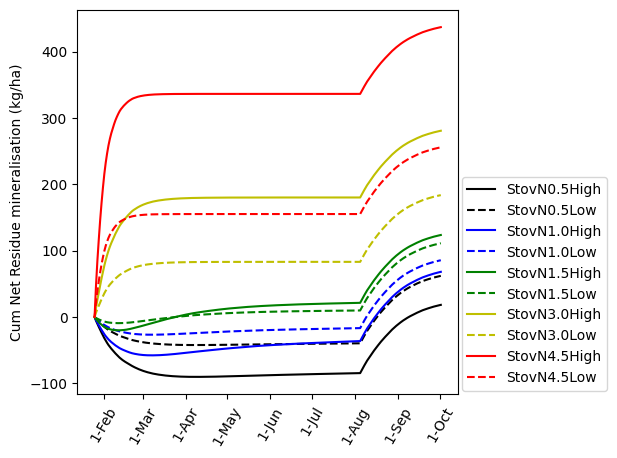

In [5]:
cols = ['k','k','b','b','g','g','y','y','r','r']
lines = ['-','--','-','--','-','--','-','--','-','--',]

Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'ResidueN')].cumsum(),lines[pos],color=cols[pos],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum Net Residue mineralisation (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
Graph.tight_layout(pad=1.5)
plt.savefig(os.path.join(outPath, 'Residues.png'))

In [6]:
AllData

StovN0.5High                                            \
                    SoilMineralN   UptakeN  ResidueN   SoilOMN FertiliserN   
Date                                                                         
2023-01-25 12:00:00     0.000000  0.091056  0.000000  1.230949         0.0   
2023-01-26 12:00:00    45.845049  0.000000 -5.436329  1.281378         0.0   
2023-01-27 12:00:00    42.167211  0.000000 -4.838912  1.161074         0.0   
2023-01-28 12:00:00    38.761798  0.000000 -4.456937  1.051523         0.0   
2023-01-29 12:00:00    35.343665  0.000000 -4.464191  1.046058         0.0   
...                          ...       ...       ...       ...         ...   
2023-09-27 12:00:00    42.851970  5.204637  0.569222  0.634110         0.0   
2023-09-28 12:00:00    39.588900  4.388870  0.528628  0.597172         0.0   
2023-09-29 12:00:00    36.938870  3.726362  0.501814  0.574518         0.0   
2023-09-30 12:00:00    34.843213  3.202448  0.505699  0.601092         0.0   
2023-10-01 12:00:00    33.146418  2.778249  0.486460  0.594993         0.0   

                                                                      ...  \
                          CropN    ProductN LostN      RSWC Drainage  ...   
Date                                                                  ...   
2023-01-25 12:00:00  124.313118   56.505963   0.0  0.900000      0.0  ...   
2023-01-26 12:00:00    0.000000    0.000000   0.0  0.902273      0.0  ...   
2023-01-27 12:00:00    0.000000    0.000000   0.0  0.880155      0.0  ...   
2023-01-28 12:00:00    0.000000    0.000000   0.0  0.831053      0.0  ...   
2023-01-29 12:00:00    0.000000    0.000000   0.0  0.781559      0.0  ...   
...                         ...         ...   ...       ...      ...  ...   
2023-09-27 12:00:00  112.631255  108.341177   0.0  0.874832      0.0  ...   
2023-09-28 12:00:00  117.020124  114.955319   0.0  0.855741      0.0  ...   
2023-09-29 12:00:00  120.746487  121.071874   0.0  0.829983      0.0  ...   
2023-09-30 12:00:00  123.948934  127.137171   0.0  0.802559      0.0  ...   
2023-10-01 12:00:00  126.727184  132.669719   0.0  0.781499      0.0  ...   

                    StovN4.5Low                                            \
                        SoilOMN FertiliserN       CropN    ProductN LostN   
Date                                                                        
2023-01-25 12:00:00    1.230949         0.0  516.377569  234.717077   0.0   
2023-01-26 12:00:00    1.281378         0.0    0.000000    0.000000   0.0   
2023-01-27 12:00:00    1.161074         0.0    0.000000    0.000000   0.0   
2023-01-28 12:00:00    1.051523         0.0    0.000000    0.000000   0.0   
2023-01-29 12:00:00    1.046058         0.0    0.000000    0.000000   0.0   
...                         ...         ...         ...         ...   ...   
2023-09-27 12:00:00    0.634110         0.0  111.138224  108.341177   0.0   
2023-09-28 12:00:00    0.597172         0.0  115.283976  114.955319   0.0   
2023-09-29 12:00:00    0.574518         0.0  118.808870  121.071874   0.0   
2023-09-30 12:00:00    0.601092         0.0  121.842826  127.137171   0.0   
2023-10-01 12:00:00    0.594993         0.0  124.478943  132.669719   0.0   

                                                                           
                         RSWC Drainage Irrigation Green cover     NDemand  
Date                                                                       
2023-01-25 12:00:00  0.900000      0.0        0.0    0.000000  516.377569  
2023-01-26 12:00:00  0.902273      0.0        0.0    0.000000    0.000000  
2023-01-27 12:00:00  0.880155      0.0        0.0    0.000000    0.000000  
2023-01-28 12:00:00  0.831053      0.0        0.0    0.000000    0.000000  
2023-01-29 12:00:00  0.781559      0.0        0.0    0.000000    0.000000  
...                       ...      ...        ...         ...         ...  
2023-09-27 12:00:00  0.874832      0.0        0.0    0.999928  118.429626  
2023-09-2